# Type well analysis 

In [17]:
library(ggplot2)
library(plotly)
library(ggpubr)
library(repr)


In [27]:
prod_data <- read.csv("Production_data.csv")
head(prod_data)

,ï..DATE,WELL,GAS.MMSCF.,WATER.STB.,OIL.STB.,MONTH
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
1,1975/12,WELL-101,0.0859,0.0007,0.1359,1
2,1976/1,WELL-101,0.2225,0.0021,0.4188,2
3,1976/2,WELL-101,0.2137,0.0019,0.3618,3
4,1976/3,WELL-101,0.2119,0.0019,0.3585,4
5,1976/4,WELL-101,0.2113,0.0019,0.3592,5
6,1976/5,WELL-101,0.1881,0.0018,0.3435,6


In [28]:
#Calcualte the oil average rates and percentile trendlines: P10, P50 and P90. Using Swanson’s Mean we can estimate the average 
#values calculated: (0.3 x P10)+(0.4 x P50)+(0.3 x P90)
prod_data_mean <- prod_data %>%
  group_by(MONTH) %>%
  summarise(Oil_prod_10 = quantile(OIL.STB.,c(.10) ,na.rm = TRUE),
            Oil_prod_50 = quantile(OIL.STB.,c(.50) ,na.rm = TRUE),
            Oil_prod_90 = quantile(OIL.STB.,c(.90) ,na.rm = TRUE),
            Oil_prod_mean = (0.3 * Oil_prod_10)+(0.4 * Oil_prod_50)+(0.3 * Oil_prod_90))

head(prod_data_mean)


`summarise()` ungrouping output (override with `.groups` argument)



MONTH,Oil_prod_10,Oil_prod_50,Oil_prod_90,Oil_prod_mean
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01909,0.06835,0.16475,0.082492
2,0.15107,0.21805,0.34197,0.235132
3,0.11599,0.22460,0.34059,0.226814
4,0.11011,0.24125,0.33960,0.231413
5,0.10814,0.23520,0.33022,0.225588
6,0.09416,0.22420,0.34290,0.220798


Warning message:
"Removed 3947 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


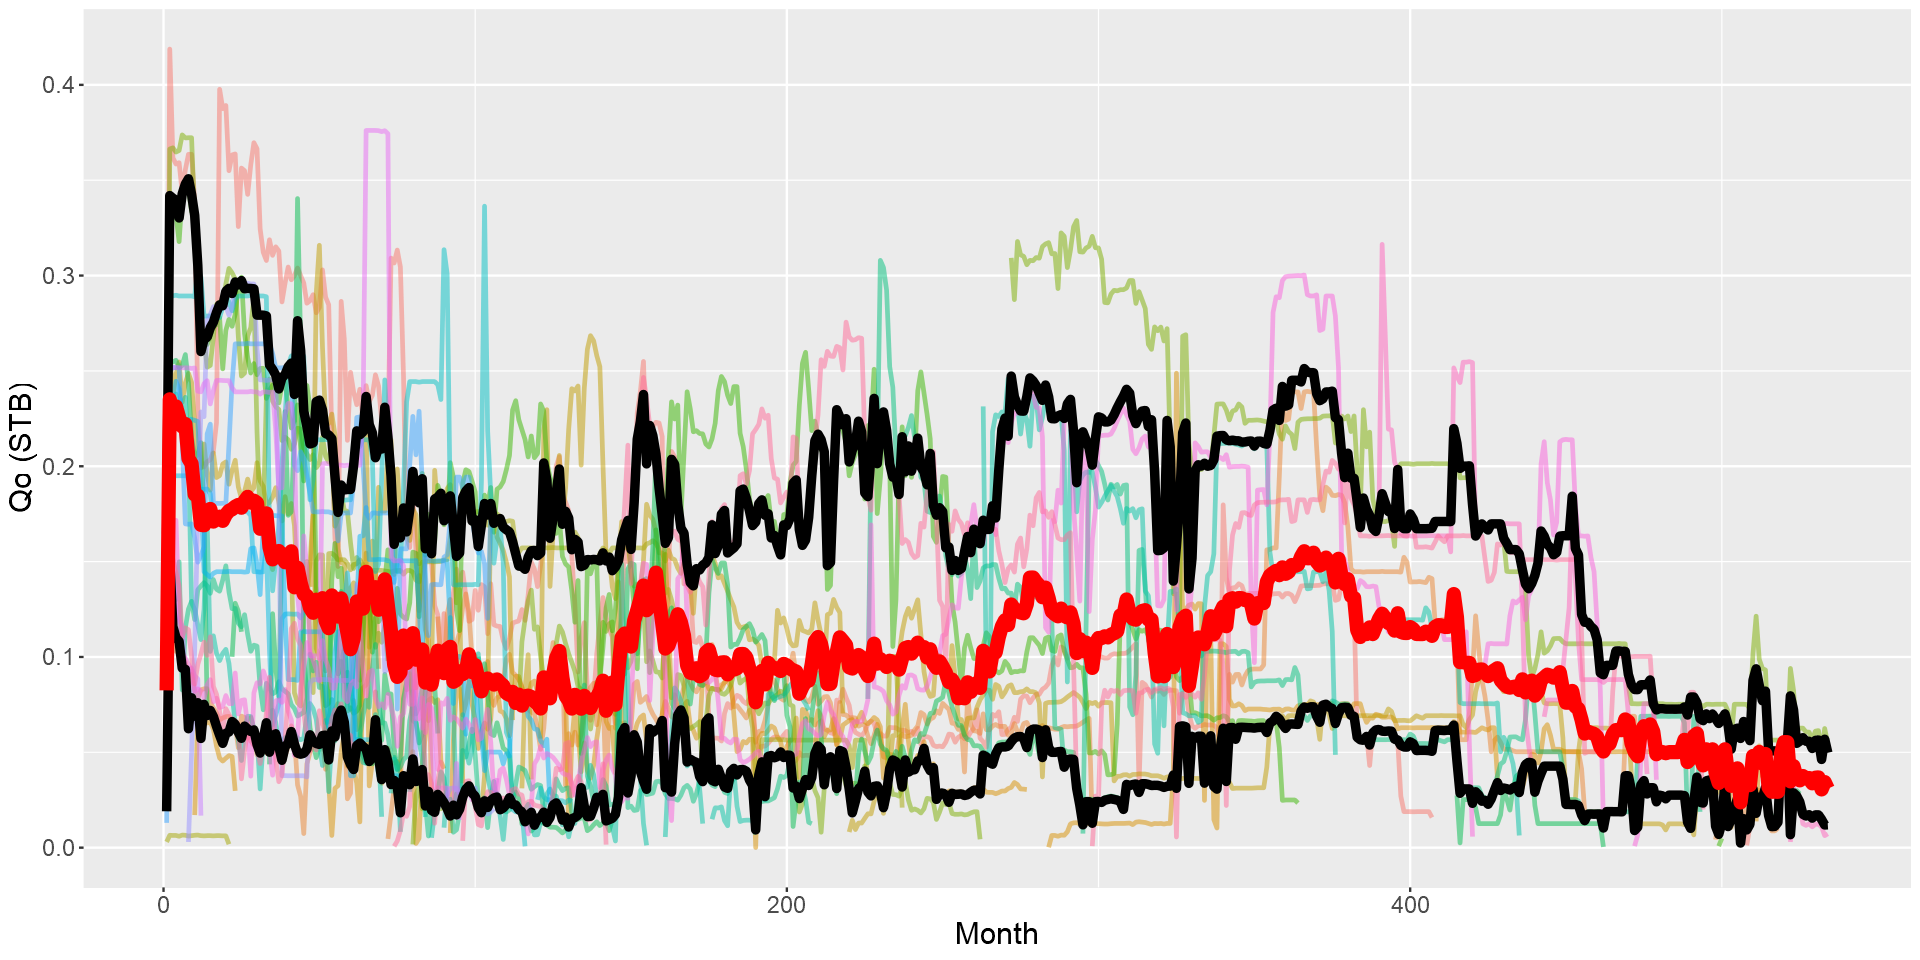

In [29]:
#Plot
options(repr.plot.width=16, repr.plot.height=8)

plot_prod <-ggplot() + 
  geom_line(data = prod_data, aes(x = MONTH, y = OIL.STB., col = WELL), size = 1, alpha = 0.5) +
  geom_line(data = prod_data_mean, aes(x = MONTH, y = Oil_prod_10), size = 2)+
  geom_line(data = prod_data_mean, aes(x = MONTH, y = Oil_prod_90), size = 2)+
  geom_line(data = prod_data_mean, aes(x = MONTH, y = Oil_prod_mean), size = 3, color = "red",) +
  theme(legend.position = "none", axis.title.x = element_text(size=18), axis.title.y = element_text(size=18),
        axis.text.x = element_text(size=14),axis.text.y = element_text(size=14)) + 
  ylab("Qo (STB)") + xlab("Month")

plot_prod
